# Functions

In [1]:
def graph_var_importance(gradient, x, y):
    from sklearn.model_selection import KFold
    from sklearn.feature_selection import RFECV
    
    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    )
    rfecv.fit(x, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(16, 12))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_,
    )
    plt.show()
    return list(rfecv.get_feature_names_out())

# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from TemporalSeries import TemporalSerie
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [3]:
data = pd.read_csv('canada_per_capita.csv', index_col='year', engine='c', parse_dates=True)
df = data.copy()

In [4]:
df.drop('Unnamed: 2', axis=1, inplace=True)

In [5]:
df

,per capita income (US$)
year,
1970-01-01,3399.299037
1971-01-01,3768.297935
1972-01-01,4251.175484
1973-01-01,4804.463248
1974-01-01,5576.514583
1975-01-01,5998.144346
1976-01-01,7062.131392
1977-01-01,7100.126170
1978-01-01,7247.967035


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 1970-01-01 to 2016-01-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   per capita income (US$)  47 non-null     float64
dtypes: float64(1)
memory usage: 752.0 bytes


In [7]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='year'>

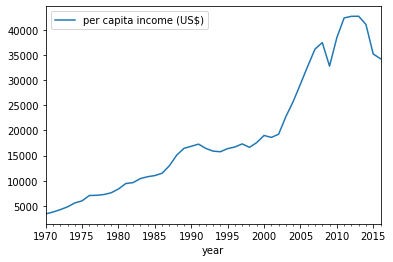

In [8]:
df.plot(kind='line')

Dickey–Fuller test: p=0.994767


<Figure size 1728x1440 with 0 Axes>

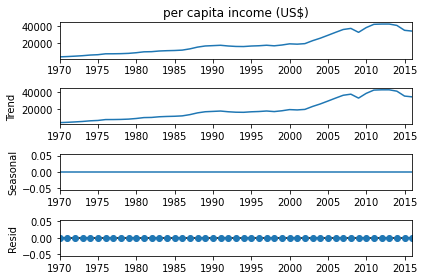

In [9]:
plt.figure(figsize=[24, 20])
sm.tsa.seasonal_decompose(df['per capita income (US$)']).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['per capita income (US$)'])[1])
plt.show()

In [10]:
# Box cox Transformation
df['per capita income (US$)_box'], lmbda = stats.boxcox(df['per capita income (US$)'])
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['per capita income (US$)'])[1])

Dickey–Fuller test: p=0.994767


In [11]:
# Seasonal Differentiation
df['per capita income (US$)_diff'] = df['per capita income (US$)_box'] - df['per capita income (US$)_box'].shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['per capita income (US$)_diff'][12:])[1])

Dickey–Fuller test: p=0.003650


Dickey–Fuller test: p=0.000488


<Figure size 1080x504 with 0 Axes>

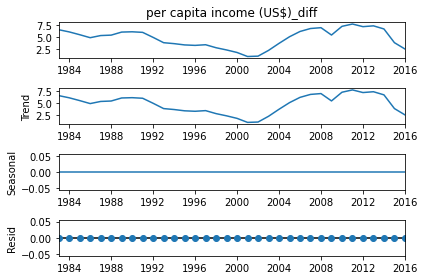

In [12]:
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df['per capita income (US$)_diff'][13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['per capita income (US$)_diff'][13:])[1])
plt.tight_layout()
plt.show()

/opt/python/envs/default/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


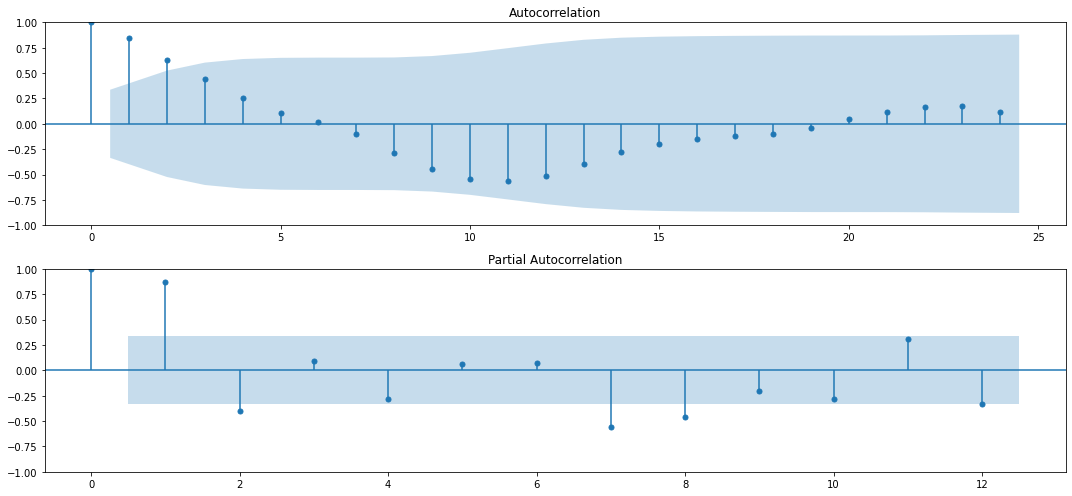

In [13]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['per capita income (US$)_diff'][13:].values.squeeze(), lags=24, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['per capita income (US$)_diff'][13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

In [14]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df['per capita income (US$)_box'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [15]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters        aic
50  (2, 2, 1, 0)  81.176653
49  (2, 2, 0, 1)  81.836361
19  (1, 0, 0, 1)  82.092291
7   (0, 1, 0, 1)  82.148715
20  (1, 0, 1, 0)  82.431896
                                      SARIMAX Results                                      
Dep. Variable:         per capita income (US$)_box   No. Observations:                   47
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 12)   Log Likelihood                 -34.588
Date:                             Wed, 27 Jul 2022   AIC                             81.177
Time:                                     10:38:29   BIC                             90.335
Sample:                                 01-01-1970   HQIC                            84.300
                                      - 01-01-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

Dickey–Fuller test:: p=0.000017


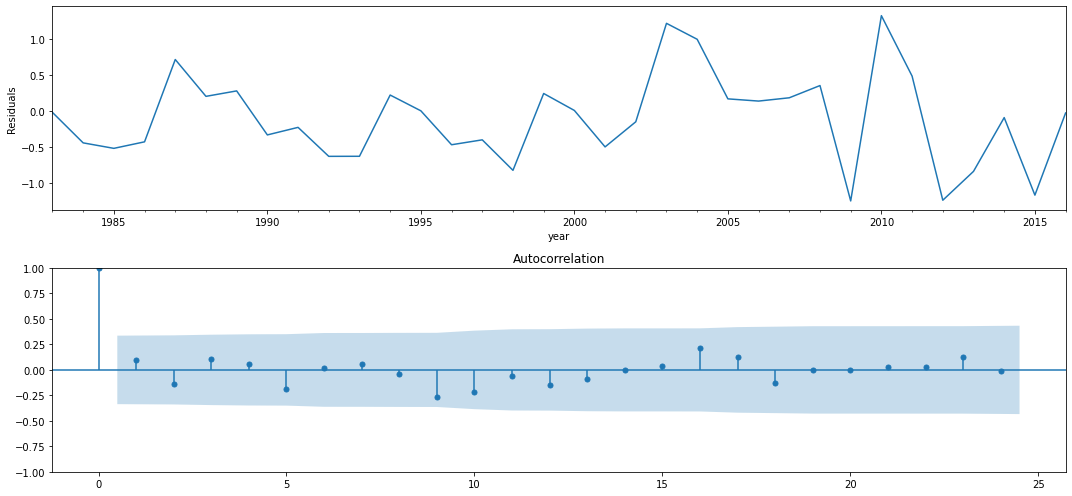

In [17]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=24, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [18]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

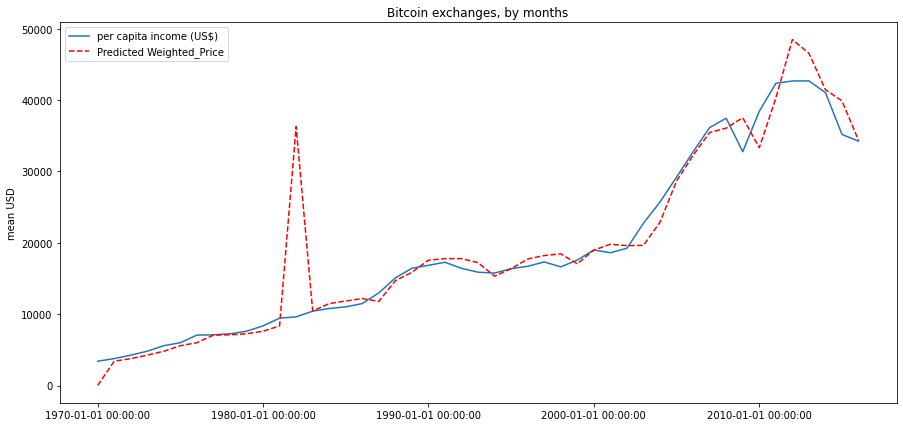

In [22]:
import numpy as np
df_month2 = df[['per capita income (US$)']]
date_list = [2017, 2018, 2019, 2020, 2021, 2022]
future = pd.DataFrame(index=date_list, columns= df.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2['per capita income (US$)'].plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()